# ARIMA
- Website usage
- Adapted from https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv 

## Setting up

In [1]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
# kpss_test
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

# Data preparation

## Load data

In [2]:
import pandas as pd
df_all = pd.read_csv('www_usage.csv')
df_all.head()

,date,usage
0,2018-01-01,88
1,2018-01-02,84
2,2018-01-03,85
3,2018-01-04,85
4,2018-01-05,84


In [3]:
df_all['date'] = pd.to_datetime(df_all['date'])
df = df_all.set_index('date')
df.index.freq ='D'
df.head()

,usage
date,
2018-01-01,88
2018-01-02,84
2018-01-03,85
2018-01-04,85
2018-01-05,84


In [4]:
df.describe()

,usage
count,100.000000
mean,137.080000
std,39.999414
min,83.000000
25%,99.000000
50%,138.500000
75%,167.500000
max,228.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2018-01-01 to 2018-04-10
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   usage   100 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


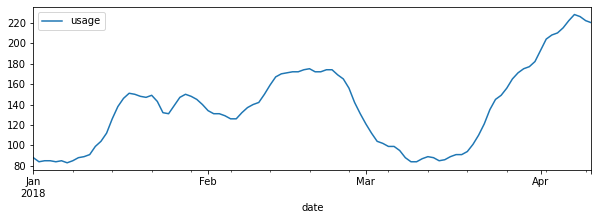

In [6]:
import matplotlib.pyplot as plt
df.plot(figsize=(10, 3))
plt.show()

In [7]:
# Let me change the variable name
df_avg = df.copy()

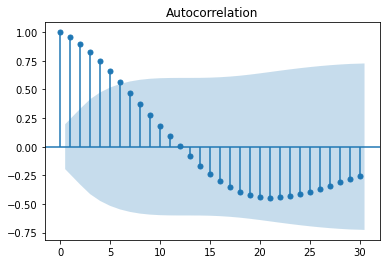

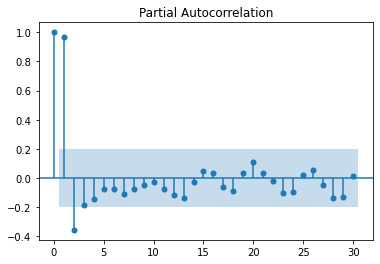

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_avg, lags=30)
plot_pacf(df_avg, lags=30)
plt.show()

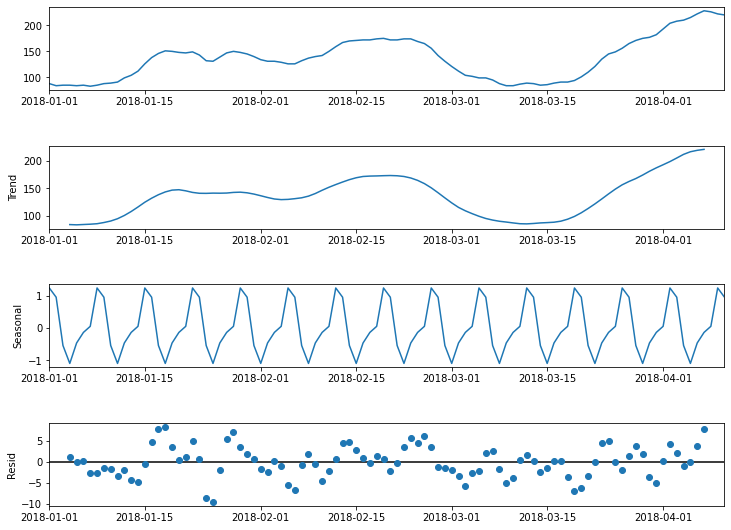

In [9]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df_avg, model='additive')
fig = decomposition.plot()
fig.set_size_inches(11,8)

In [10]:
adf_test(df_avg)
kpss_test(df_avg)

Results of Dickey-Fuller Test:
Test Statistic                 -2.464240
p-value                         0.124419
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Results of KPSS Test:
Test Statistic            0.230579
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
C:\Users\admin\miniconda3\envs\pythonclass\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length select

## Test for stationariy and seasonality

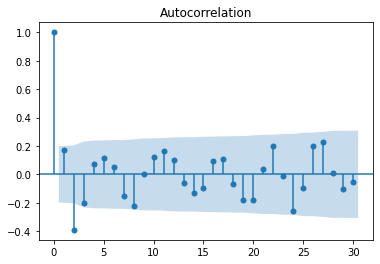

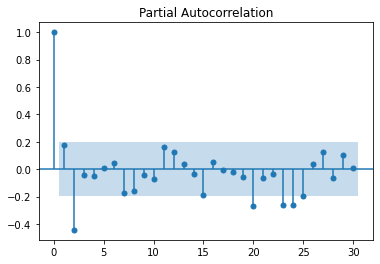

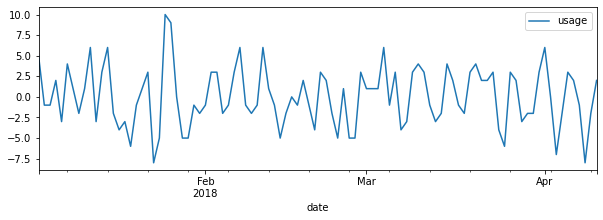

Results of Dickey-Fuller Test:
Test Statistic                -9.929762e+00
p-value                        2.843429e-17
#Lags Used                     1.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64
Results of KPSS Test:
Test Statistic            0.087223
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
C:\Users\admin\miniconda3\envs\pythonclass\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automa

In [11]:
df_diff = df_avg.diff(1).diff(1).dropna()
plot_acf(df_diff, lags=30)
plot_pacf(df_diff, lags=30)
fig, ax = plt.subplots(figsize=(10, 3))
df_diff.plot(ax=ax)
plt.show()
adf_test(df_diff)
kpss_test(df_diff)

# Model selection

In [12]:
import itertools
p = [0,1,2]
d = [0,1,2]
q = [0,1,2]
params = list(itertools.product(p, d, q))
print(f"Number of models to test: {len(params)}")

Number of models to test: 27


In [18]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

df_results = pd.DataFrame()
for param in params:
    pdq = param[0:3]
    try:
        mod = ARIMA(df_avg, order=pdq)
        results = mod.fit()
        data = {'param': pdq, 'AIC':results.aic }
        df_results = df_results.append(data, ignore_index=True)
    except:
        continue
df_results = df_results.sort_values(by='AIC',ascending=True)

C:\Users\admin\miniconda3\envs\pythonclass\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\admin\miniconda3\envs\pythonclass\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [19]:
df_results

,AIC,param
24,511.464783,"(2, 2, 0)"
17,513.188831,"(1, 2, 2)"
25,513.255933,"(2, 2, 1)"
13,514.300254,"(1, 1, 1)"
26,515.130547,"(2, 2, 2)"
14,516.252648,"(1, 1, 2)"
22,516.292220,"(2, 1, 1)"
23,517.163969,"(2, 1, 2)"
8,517.214099,"(0, 2, 2)"
5,519.875932,"(0, 1, 2)"


# Model training

In [20]:
rank = 1
pdq = df_results.iloc[rank-1,1]

print(f"Using ({pdq[0]},{pdq[1]},{pdq[2]})")

mod = ARIMA(df_avg, order=pdq)
results = mod.fit()

Using (2,2,0)


# Model evaluation

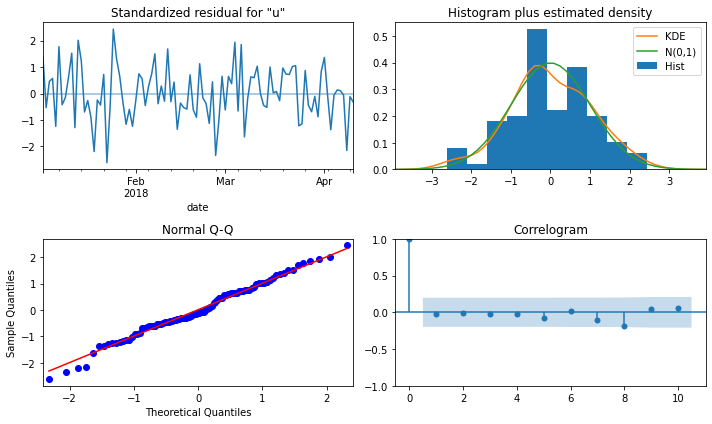

In [21]:
fig = results.plot_diagnostics(figsize=(10, 6))
fig.tight_layout()

In [22]:
pred = results.get_prediction(start=df_avg.index[1], end=df_avg.index[-1], dynamic=False)
comb = pd.concat([df_avg, pred.predicted_mean], axis=1).dropna()
comb['error'] = comb.iloc[:,0] - comb.iloc[:,1]
comb['percentage'] = comb['error']/comb.iloc[:,0]*100

MAE = comb['error'].abs().mean()
RMSE = np.sqrt((comb['error']**2).mean())
MAPE = comb['percentage'].abs().mean()

print(f"Mean absolute error: {MAE:6.3f}")
print(f"Root mean squared error: {RMSE:6.3f}")
print(f"Mean absolute percentage error: {MAPE:6.3f}")

Mean absolute error:  3.028
Root mean squared error:  5.776
Mean absolute percentage error:  2.599


# Plotting and forecasting

In [23]:
num_forecast = 10

start_dt = df_avg.index[10]
end_dt_data = df_avg.index[-1]
if num_forecast > 0:
    end_dt = end_dt_data + num_forecast * end_dt_data.freq
else:
    end_dt = end_dt_data

print(start_dt)
print(end_dt)

2018-01-11 00:00:00
2018-04-20 00:00:00


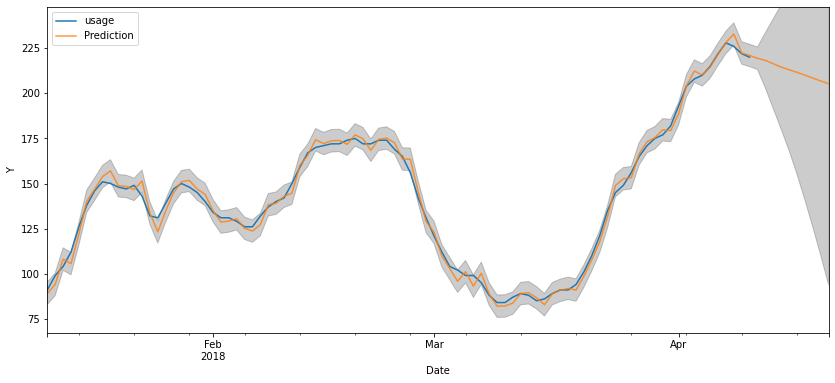

In [27]:
pred = results.get_prediction(start=pd.to_datetime(start_dt), end=pd.to_datetime(end_dt), dynamic=False)
pred_ci = pred.conf_int()
ax = df_avg.plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Prediction', alpha=.8, figsize=(14, 6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Y')
ax.set_xlim(start_dt,end_dt)
yp_max = pred.predicted_mean.max()
yp_min = pred.predicted_mean.min()
yp_mean = pred.predicted_mean.mean()
ax.set_ylim(yp_min-0.1*yp_mean,yp_max+0.1*yp_mean)
plt.legend()
plt.show()

In [25]:
if num_forecast > 0:
    display(pred.predicted_mean.loc[end_dt_data:end_dt])

2018-04-10    221.009850
2018-04-11    219.397177
2018-04-12    218.273261
2018-04-13    216.399223
2018-04-14    214.561386
2018-04-15    213.063466
2018-04-16    211.637251
2018-04-17    210.079726
2018-04-18    208.456737
2018-04-19    206.874735
2018-04-20    205.332153
Freq: D, Name: predicted_mean, dtype: float64